## PyPCD
- 본 챕터에서는 [pypcd](https://github.com/dimatura/pypcd)의 기본적인 파일 입력, Numpy변환, 저장 방법에 대하여 정리 하였습니다. 

- pypcd는 **Point Cloud Library**에 기반한 PCD파일 읽기/쓰기가 가능한 Pure Python module 입니다. 
- 특징으로는 ROS 메시지 전송을 지원 합니다. 

> [PCL-To-All Docker](https://hub.docker.com/r/adioshun/pcl_to_all/)에는 설치 되어 있지 않습니다.

In [1]:
%load_ext watermark
%watermark -d -v -p pypcd

2018-11-23 

CPython 2.7.12
IPython 5.8.0

pypcd 0.1.1


In [2]:
import sys
!{sys.executable} -m pip install --user pypcd

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import pypcd
import numpy as np

import os
os.chdir("/workspace/3D_People_Detection_Tracking") 

In [2]:
cloud = pypcd.PointCloud.from_path('./sample/lobby.pcd')

ValueError: field '__0000' occurs more than once

In [8]:
./sample/lobby.pcd

/workspace/3D_People_Detection_Tracking


In [13]:
cloud.get_metadata()

{'count': [1, 1, 1, 1],
 'data': 'ascii',
 'fields': ['x', 'y', 'z', 'rgb'],
 'height': 1,
 'points': 2750,
 'size': [4, 4, 4, 4],
 'type': ['F', 'F', 'F', 'F'],
 'version': '0.7',
 'viewpoint': [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 'width': 2750}

In [14]:
print(cloud.pc_data['rgb'])

[ 0.  0.  0. ...,  0.  0.  0.]


## array로 변경

In [15]:
new_cloud_data = cloud.pc_data.copy()

In [16]:
# we need numpy now
import numpy as np

# convert the structured numpy array to a ndarray
new_cloud_data = cloud.pc_data.view(np.float32).reshape(cloud.pc_data.shape + (-1,))

In [17]:
new_cloud_data.shape[0]

2750

In [18]:
new_cloud_data

array([[  1.00166738,   5.48460579,  -1.49390364,   0.        ],
       [  1.01868272,   5.46968126,  -1.49079776,   0.        ],
       [  1.03777063,   5.46609163,  -1.49079776,   0.        ],
       ..., 
       [ 18.39475441,  -6.8848362 ,  -1.71836269,   0.        ],
       [ 18.24389076,  -6.90107012,  -1.70650947,   0.        ],
       [ 18.23457718,  -6.97040224,  -1.70790386,   0.        ]], dtype=float32)

In [19]:
import sys
sys.path.append("/workspace/include")
import pcl_helper

n_random_color = 20
random_color = np.zeros(n_random_color,float)
for i in range(0,new_cloud_data.shape[0]):
    #labbels[0]
    new_cloud_data[i,3:4] = pcl_helper.rgb_to_float(pcl_helper.random_color_gen())
    


In [20]:
new_cloud_data[:,0:3]

array([[  1.00166738,   5.48460579,  -1.49390364],
       [  1.01868272,   5.46968126,  -1.49079776],
       [  1.03777063,   5.46609163,  -1.49079776],
       ..., 
       [ 18.39475441,  -6.8848362 ,  -1.71836269],
       [ 18.24389076,  -6.90107012,  -1.70650947],
       [ 18.23457718,  -6.97040224,  -1.70790386]], dtype=float32)

In [21]:
new_cloud_data

array([[  1.00166738e+00,   5.48460579e+00,  -1.49390364e+00,
          1.91391502e-38],
       [  1.01868272e+00,   5.46968126e+00,  -1.49079776e+00,
          2.06848245e-38],
       [  1.03777063e+00,   5.46609163e+00,  -1.49079776e+00,
          6.83871486e-39],
       ..., 
       [  1.83947544e+01,  -6.88483620e+00,  -1.71836269e+00,
          5.10465005e-40],
       [  1.82438908e+01,  -6.90107012e+00,  -1.70650947e+00,
          2.31961699e-39],
       [  1.82345772e+01,  -6.97040224e+00,  -1.70790386e+00,
          1.92780974e-39]], dtype=float32)

## After decode Tool

In [22]:
%matplotlib inline

# Now visualize the points with matplotlib
import matplotlib.pyplot as plt

In [23]:
# split the rgb column into three columns: red, green and blue
rgb_columns = pypcd.decode_rgb_from_pcl(cloud.pc_data['rgb'])

# normalize the rgb values (they should be between [0, 1])
rgb_columns = (rgb_columns / 255.0).astype(np.float)

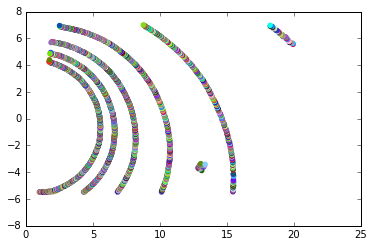

In [24]:
# Plot again with color
plt.scatter(new_cloud_data[:, [0]], -new_cloud_data[:, [1]], color=rgb_columns)
plt.axis('scaled');

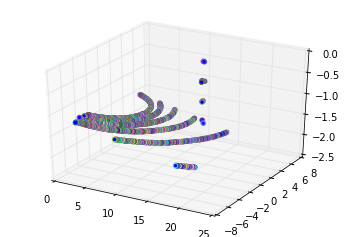

In [25]:
from mpl_toolkits.mplot3d import Axes3D

# Create a figure with a subplot with three axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(new_cloud_data[:,0], new_cloud_data[:,1], new_cloud_data[:,2], color=rgb_columns);

In [26]:
type(rgb_columns)

numpy.ndarray

In [27]:
rgb_columns.shape

(2750, 3)

In [28]:
rgb_columns.dtype

dtype('float64')

In [29]:
rgb_columns

array([[ 0.81568627,  0.40784314,  0.16470588],
       [ 0.88235294,  0.23529412,  0.87843137],
       [ 0.29019608,  0.46666667,  0.55686275],
       ..., 
       [ 0.01960784,  0.55686275,  0.97254902],
       [ 0.09803922,  0.25882353,  0.14901961],
       [ 0.07843137,  0.99215686,  0.95294118]])

# without decode Tool

In [30]:
rgb_columns1 = np.asarray(pcl_helper.random_color_gen())


In [31]:
type(rgb_columns1)

numpy.ndarray

In [32]:
rgb_columns1 = (rgb_columns1 / 255.0).astype(np.float)

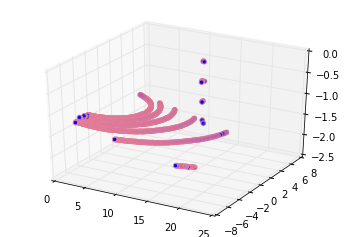

In [33]:
from mpl_toolkits.mplot3d import Axes3D

# Create a figure with a subplot with three axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(new_cloud_data[:,0], new_cloud_data[:,1], new_cloud_data[:,2], color=rgb_columns1);

In [34]:
new_cloud_data[:,0]

array([  1.00166738,   1.01868272,   1.03777063, ...,  18.39475441,
        18.24389076,  18.23457718], dtype=float32)

In [35]:
rgb_columns

array([[ 0.81568627,  0.40784314,  0.16470588],
       [ 0.88235294,  0.23529412,  0.87843137],
       [ 0.29019608,  0.46666667,  0.55686275],
       ..., 
       [ 0.01960784,  0.55686275,  0.97254902],
       [ 0.09803922,  0.25882353,  0.14901961],
       [ 0.07843137,  0.99215686,  0.95294118]])

In [36]:
# And print some sample form the rgb column
print(new_cloud_data[:100, [3]]).reshape(1, -1)

[[  1.91391502e-38   2.06848245e-38   6.83871486e-39   1.80425767e-38
    2.00014266e-38   2.20729788e-38   1.46291790e-38   1.87544321e-38
    7.10961388e-39   5.17087962e-39   1.88927753e-38   8.62621118e-39
    1.74704910e-38   8.19271249e-39   1.48454610e-38   2.20485345e-38
    6.35897192e-39   3.21686980e-39   1.27655263e-38   1.59758577e-38
    2.24054873e-39   2.12435880e-38   9.59862263e-39   1.64438717e-38
    2.14944611e-39   2.20090781e-38   1.72197553e-38   1.82830199e-38
    1.33351051e-38   1.54079913e-39   1.32759885e-38   1.71286190e-38
    8.82327438e-39   1.80263455e-39   2.21174868e-38   1.66724557e-38
    1.54759823e-39   1.31544511e-38   1.47332997e-38   2.08111109e-38
    2.03578525e-38   2.20660633e-38   1.09654996e-38   1.43230289e-38
    1.60405935e-39   1.42220444e-38   1.13297994e-38   1.36603143e-38
    2.30696046e-38   9.44780228e-39   1.64677541e-38   1.88774325e-38
    2.19971461e-38   5.13602792e-39   9.96597582e-39   8.00565316e-39
    4.61137057e-39  

## 2D 시각화